<a href="https://colab.research.google.com/github/hamnakhan11/hamna/blob/main/Predict_Future_Stock_Prices_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

/tmp/ipython-input-1603817550.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


AAPL - RandomForest Mean Squared Error: 904.44


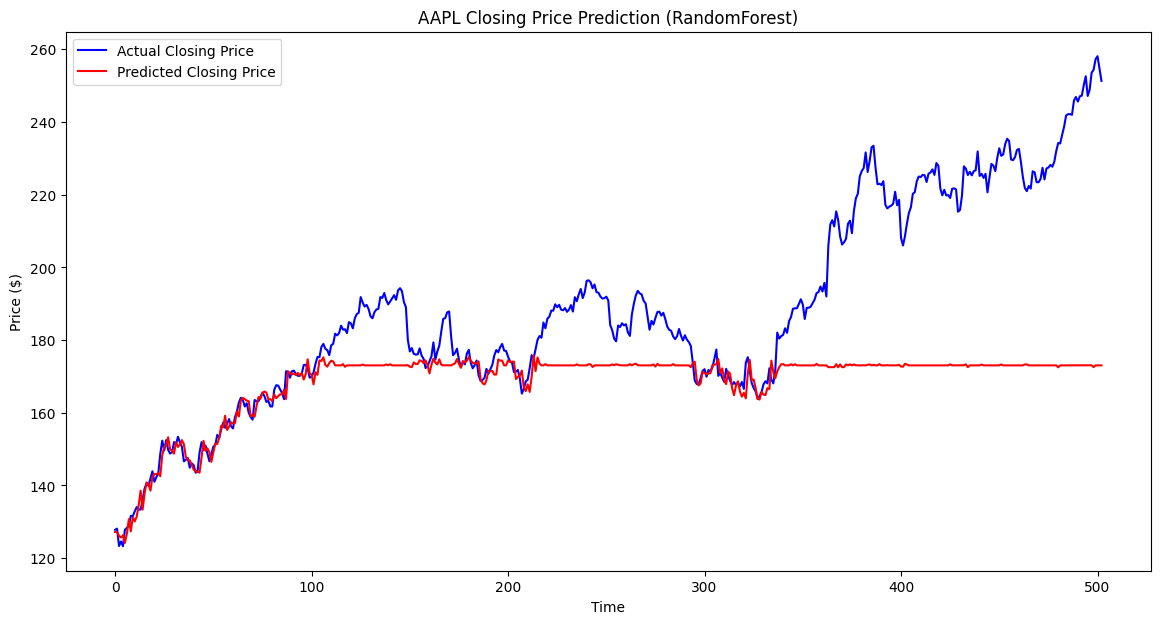

/tmp/ipython-input-1603817550.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


TSLA - LinearRegression Mean Squared Error: 79.47


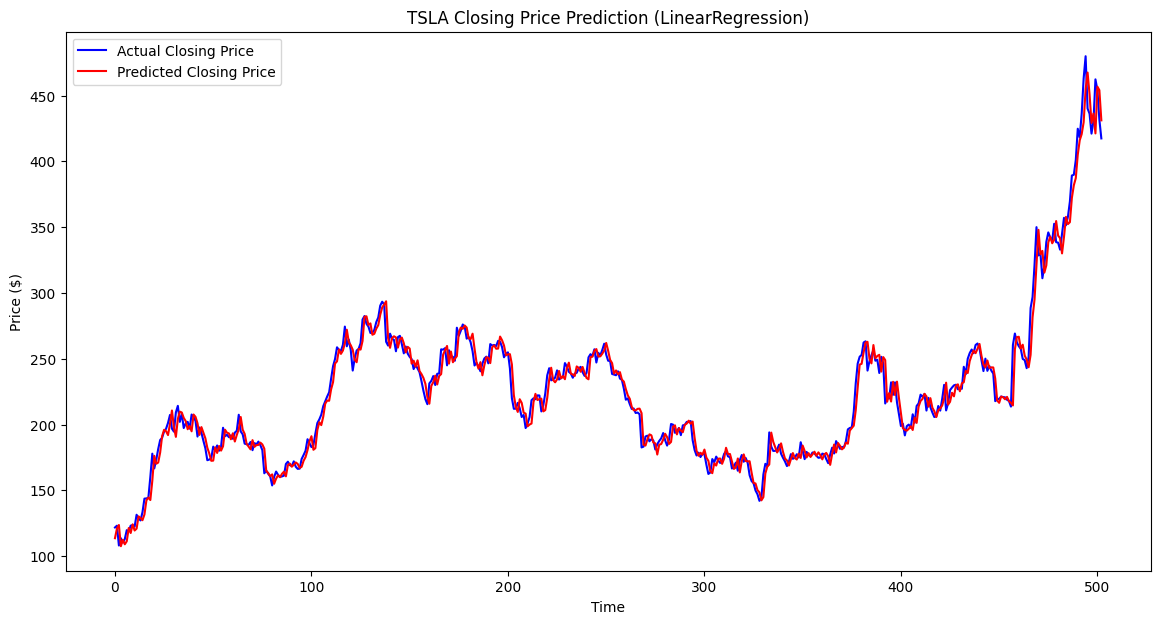

In [ ]:
def predict_stock(ticker, model_type='RandomForest', start_date="2015-01-01", end_date="2024-12-31"):
    # Download historical stock data
    data = yf.download(ticker, start=start_date, end=end_date)

    # Create next day's close column
    data['Next_Close'] = data['Close'].shift(-1)
    data.dropna(inplace=True)

    # Features and target
    X = data[['Open', 'High', 'Low', 'Volume']]
    y = data['Next_Close']

    # Train-test split (no shuffle for time series)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Select model
    if model_type == 'RandomForest':
        model = RandomForestRegressor(n_estimators=100, random_state=42)
    elif model_type == 'LinearRegression':
        model = LinearRegression()
    else:
        raise ValueError("model_type must be 'RandomForest' or 'LinearRegression'")

    # Train model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    print(f"{ticker} - {model_type} Mean Squared Error: {mse:.2f}")

    # Plot actual vs predicted
    plt.figure(figsize=(14, 7))
    plt.plot(y_test.values, label='Actual Closing Price', color='blue')
    plt.plot(y_pred, label='Predicted Closing Price', color='red')
    plt.title(f'{ticker} Closing Price Prediction ({model_type})')
    plt.xlabel('Time')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.show()

# Predict Apple using Random Forest
predict_stock("AAPL", model_type='RandomForest')

# Predict Tesla using Linear Regression
predict_stock("TSLA", model_type='LinearRegression')